# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is a movie dataset which i got from kaggle. This Dataset contains contains information about 10,000 movies which was collected from The Movie Database (TMDb). This Dataset contains numerous information about movies within the year span of 1960-2016 across all genres. 

The analysis i am going to conduct on this Dataset will answer the following questions:
1. Which genres are the most popular from year to year?
2. Does the popularity of a movie have any effect on the revenue the movie generates
3. Which genre of movie produces the highest revenue?
4. Does the average vote collated for each genre have a significant effect on the revenue?


The first step is to import all the packages that will be needed for this analysis. This is important as without them some of the codes written will produce an error message when you try run it

In [1]:
# This is to import all the packages that will needed during my analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

This is the first section of the analysis. To begin i will load in my data from the folder where it is stored, check for cleanliness, trim and clean my dataset for the analysis stage


### General Properties

In [3]:
# This is to load in my data
df= pd.read_csv('tmdb-movies.csv')
#I didn't use the sep function because the data is already seperated by comma

After reading in my data, i am going to check for the informations about the dataframe and if there are any irregularities

In [4]:
#To know how many rows and columns i have in my dataframe
df.shape

(10866, 21)

The above output indicates that there are 10,866 rows and 21 columns in the dataframe. The '.shape' function provides a summary on the structure of the dataframe

In [5]:
#To see the design of the dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The '.head()' function displays the first 5 rows in the dataframe and the column labels. Looking at the labels it is okay as it is for my analysis so i will not be changing any labels.

In [6]:
#To know the datatype associated with each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The '.info()' function displays the makeup of each column. It show the datatype, total number of cells with values for each column. The result displayed shows that there are some columns with null values of which i will have to clean to ensure the dataframe is ready for analysis

In [7]:
#To show the mean and other statistics about numerical columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The above shows statistical values of columns that have numerical data. It will not show any of the columns that are non-numerical

Looking at the structures of the dataframe above, it shows that there are columns and row that will be dropped as they have null values and will not be relevant in the analysis of the data

### After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.


In [8]:
#To remove some of the columns i will not need for my analysis
df.drop(['id', 'imdb_id', 'homepage', 'release_date','tagline','keywords','production_companies'], axis=1, inplace=True)
df.info()
# This will display the information about the new columns left in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   overview        10862 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


The above code removed 6 of the columns i didnt need as they dont have any correlation to the questions i want to use this dataset to answer. As the cleaning continues there will be other rows and columns that i will drop

The next step is to check for duplicates and drop them

In [9]:
# This is to know how many rows are duplicated
sum(df.duplicated())

1

In [10]:
# To drop all duplicates
df.drop_duplicates(inplace=True)

In [11]:
# This is to know the current amount of rows and colums we have after dropping
df.shape

(10865, 14)

In [12]:
# To know the amount of null values per column
df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

I am going to filter out the rows without null values because the rows with the null values are not useful right now for my analysis but can be useful later on

In [13]:
#rows without null values
filtered_df = df.loc[df.notna().all(1)]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10729 non-null  float64
 1   budget          10729 non-null  int64  
 2   revenue         10729 non-null  int64  
 3   original_title  10729 non-null  object 
 4   cast            10729 non-null  object 
 5   director        10729 non-null  object 
 6   overview        10729 non-null  object 
 7   runtime         10729 non-null  int64  
 8   genres          10729 non-null  object 
 9   vote_count      10729 non-null  int64  
 10  vote_average    10729 non-null  float64
 11  release_year    10729 non-null  int64  
 12  budget_adj      10729 non-null  float64
 13  revenue_adj     10729 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


The next step is to split the genre column. Most of the movies have multiple genres and is seperated by "|" . In most of our analysis we will need the individual genre

In [14]:
# to split the genres
filtered_df = filtered_df.assign(genres=df['genres'].str.split('|')).explode('genres').reset_index(drop=True)
filtered_df

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26745,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery,11,6.5,1966,0.000000e+00,0.000000e+00
26746,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Comedy,11,6.5,1966,0.000000e+00,0.000000e+00
26747,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action,22,5.4,1966,0.000000e+00,0.000000e+00
26748,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Comedy,22,5.4,1966,0.000000e+00,0.000000e+00


# The breakdown of the above code 
filtered_df = #reassigning the output into the same dataframe

filtered_df.assign(genres=df['genres'].str.split('|')). # this splits the string in the genres column by "|" then assignes it to genres

.explode('genres')#This tell it to add the new values as rows with the other corresponding information

.reset_index(drop=True) #This tells the dataframe to reset its index to accommodate the new entry


In [15]:
#To show the current status of our dataframe
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26750 entries, 0 to 26749
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      26750 non-null  float64
 1   budget          26750 non-null  int64  
 2   revenue         26750 non-null  int64  
 3   original_title  26750 non-null  object 
 4   cast            26750 non-null  object 
 5   director        26750 non-null  object 
 6   overview        26750 non-null  object 
 7   runtime         26750 non-null  int64  
 8   genres          26750 non-null  object 
 9   vote_count      26750 non-null  int64  
 10  vote_average    26750 non-null  float64
 11  release_year    26750 non-null  int64  
 12  budget_adj      26750 non-null  float64
 13  revenue_adj     26750 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 2.9+ MB


I am done with the cleaning of the data set. i will begin my exploratory data analysis to answer the questions i stated at the introduction which are:
1. Which genres are the most popular from year to year?
2. Does the popularity of a movie have any effect on the revenue the movie generates
3. Which genre of movie produces the highest revenue?
4. Does the average vote collated for each genre have a significant effect on the revenue?


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### How many movies are in each genre?

In [16]:
#Firstly we want to find out what genres we have in out dataframe
filtered_df['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

This show us that we have 20 genres of movies present in our dataframe. We used unique() to pull out a single instance of each genre

In [17]:
#To know how many movies are in each genre
filtered_df['genres'].value_counts()

Drama              4746
Comedy             3774
Thriller           2902
Action             2376
Romance            1707
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               398
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres, dtype: int64

This shows the number of movies that are assigned to each genre. I am going to plot a bar chart to visualize it

<AxesSubplot:title={'center':'Amount of movies in each Genre'}, xlabel='Genre', ylabel='Number of Movies'>

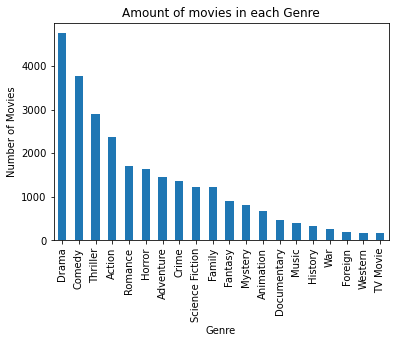

In [18]:
#This is to know show many movies are in each genre
filtered_df['genres'].value_counts().plot(kind ='bar', xlabel='Genre',ylabel='Number of Movies', title='Amount of movies in each Genre')

The above result shows the amount of movies in each genre. Drama genre has the highest amount of movies while TV Movie genre has the lowest.

### Which genres are the most popular from year to year?

In [19]:
# This is to show the genre available in each year according to their average popularity
filtered_df.groupby(['release_year','genres']).mean('popularity')

popularity        budget       revenue  \
release_year genres                                                    
1960         Action             0.590724  1.750000e+06  8.113125e+06   
             Adventure          0.700981  5.500000e+05  9.810000e+05   
             Comedy             0.396000  7.537500e+05  6.012500e+06   
             Crime              0.346479  0.000000e+00  0.000000e+00   
             Drama              0.566305  1.215919e+06  9.461538e+06   
...                                  ...           ...           ...   
2015         Science Fiction    2.297221  2.918369e+07  1.144888e+08   
             TV Movie           0.260574  1.500000e+05  0.000000e+00   
             Thriller           1.401877  1.242135e+07  4.529045e+07   
             War                1.284511  2.377778e+07  7.845509e+07   
             Western            3.178796  4.196667e+07  1.148233e+08   

                                 runtime   vote_count  vote_average  \
release_year genres                                                   
1960         Action           137.000000    65.875000      6.050000   
             Adventure        124.200000    82.000000      6.680000   
             Comedy            98.625000    44.875000      6.312500   
             Crime            119.000000    25.500000      5.900000   
             Drama            133.076923   138.153846      6.276923   
...                                  ...          ...           ...   
2015         Science Fiction   96.809524   698.500000      5.638095   
             TV Movie          86.250000    25.700000      6.100000   
             Thriller          98.356725   343.403509      5.471345   
             War              104.000000   384.222222      6.222222   
             Western          124.666667  1178.666667      6.316667   

                                budget_adj   revenue_adj  
release_year genres                                       
1960         Action           1.290269e+07  5.981781e+07  
             Adventure        4.055132e+06  7.232881e+06  
             Comedy           5.557374e+06  4.432997e+07  
             Crime            0.000000e+00  0.000000e+00  
             Drama            8.964932e+06  6.975962e+07  
...                                    ...           ...  
2015         Science Fiction  2.684898e+07  1.053297e+08  
             TV Movie         1.379999e+05  0.000000e+00  
             Thriller         1.142763e+07  4.166720e+07  
             War              2.187555e+07  7.217865e+07  
             Western          3.860932e+07  1.056374e+08  

[1045 rows x 8 columns]

The groupby function groups the dataframe according to the year then groups it according to the genres and provides the mean of the grouping across all numerical columns

In [20]:
#This is to show the most popular genre from year to year
d = filtered_df.groupby(["release_year"]).apply(lambda x: x.nlargest(1, "popularity")).reset_index(drop=True)
d

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,When larcenous real estate clerk Marion Crane ...,109,Drama,1180,8.0,1960,5.949601e+06,2.359350e+08
1,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,When a litter of dalmatian puppies are abducte...,79,Adventure,913,6.6,1961,2.917944e+07,1.574815e+09
2,3.170651,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,"In the film that launched the James Bond saga,...",110,Adventure,560,6.7,1962,7.929294e+06,4.296236e+08
3,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,Agent 007 is back in the second installment of...,115,Action,458,6.7,1963,1.780045e+07,5.617734e+08
4,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Guy Hamilton,Special agent 007 (Sean Connery) comes face to...,110,Adventure,602,7.0,1964,2.460594e+07,8.780804e+08
5,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,Terence Young,A criminal organization has obtained two nucle...,130,Adventure,331,6.3,1965,7.612620e+07,9.771535e+08
6,1.227582,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,Chuck Jones|Ben Washam,"Bitter and hateful, the Grinch is irritated at...",26,Animation,286,7.1,1966,2.116175e+06,0.000000e+00
7,2.550704,4000000,205843612,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,Wolfgang Reitherman,The Jungle Book follows the ups and downs of t...,78,Family,928,7.0,1967,2.614705e+07,1.345551e+09
8,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,Humanity finds a mysterious object buried bene...,149,Science Fiction,1708,7.7,1968,7.522756e+07,3.555466e+08
9,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure,258,6.4,1969,4.160985e+07,4.872780e+08


I assigned the output to a new data frame so that i do not change the data in my filtered dataframe. The output also shows the most popular movie genre and the movie each year according to the genre that has the highest popularity

In [21]:
# This is to define a function that i will be using multiple times during my analysis. I am defining it because it makes my work easier and cleaner
def df_bar(counts, xlabel, ylabel, title):
    counts.plot(kind ='bar', title=title, figsize=(10,5))
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)   
    plt.show()

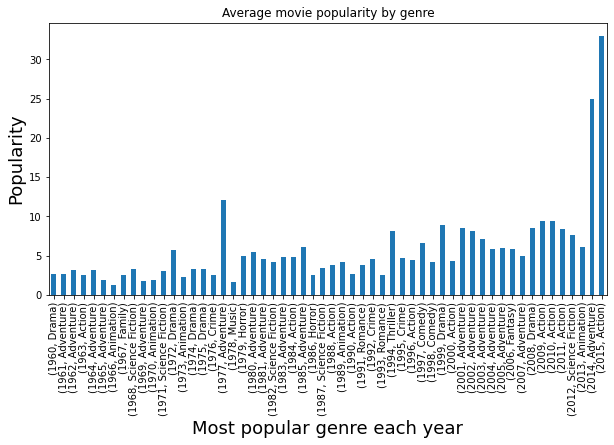

In [22]:
# This is to show the visualization of the result. I am calling the function i defined above to use in my visualization
counts=d.groupby(['release_year','genres']).max()['popularity']
df_bar(counts,'Most popular genre each year','Popularity','Average movie popularity by genre')

The above bar chart displays the year and its most popular genre. This shows that for each year has a genre that people love to watch the most.

### Does the popularity of a movie have any effect on the revenue the movie generates

In [23]:
# This is to analyze if the popularity of a movie relates to its revenue
rev=filtered_df['revenue']
pop=filtered_df['popularity']
corr = pop.corr(rev)
corr

0.6654425232361705

If the correlation value was equals to 1 then we can say there is a strong correlation but since the correlation value is 0.7 when abbreviated then the correlation between the popularity of a movie and the revenue the movie generates is slightly weak.
This means that the popularity of a movie may not influence the revenue generated by the movie.

To visualize the correlation, i will use scatterplot

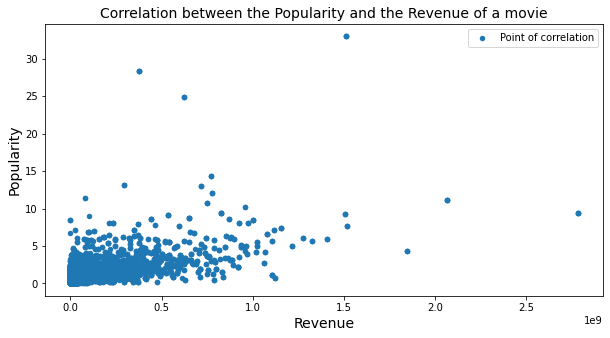

In [24]:
filtered_df.plot(x='revenue', y='popularity', kind='scatter',figsize=(10,5),label='Point of correlation');
plt.title('Correlation between the Popularity and the Revenue of a movie',fontsize=14)
plt.xlabel('Revenue',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
plt.legend(loc='best')

### Which genre of movie produces the highest average revenue?

In [25]:
# This is to group the movies according to the genres and see which one has the highest average revenue
filtered_df.groupby(['genres']).mean('revenue')

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,
Action,0.929040,2.782118e+07,7.303983e+07,105.129630,394.242424,5.784891,2000.031145,3.307109e+07,9.206722e+07
Adventure,1.158480,3.769746e+07,1.136012e+08,106.430034,515.130375,5.935427,1999.356314,4.411728e+07,1.422555e+08
Animation,0.885913,2.437686e+07,7.922287e+07,70.664157,317.146084,6.384789,2004.069277,2.662471e+07,8.975005e+07
Comedy,0.594878,1.336239e+07,3.771225e+07,96.935612,177.228670,5.901245,2000.786698,1.599806e+07,4.813518e+07
Crime,0.745331,1.767686e+07,4.239998e+07,106.926829,279.002956,6.124982,1999.483370,2.154943e+07,5.667827e+07
Documentary,0.188172,5.958754e+05,2.182688e+06,103.970213,36.200000,6.898511,2008.078723,6.358139e+05,2.425647e+06
Drama,0.592844,1.191304e+07,2.931604e+07,110.516224,183.027181,6.163611,2000.932996,1.489402e+07,4.053378e+07
Family,0.794195,2.367775e+07,7.344748e+07,90.175453,275.586491,5.986903,2000.764415,2.729229e+07,8.896531e+07
Fantasy,1.000166,3.289441e+07,9.716224e+07,101.169604,424.170705,5.856057,2000.231278,3.775393e+07,1.122142e+08


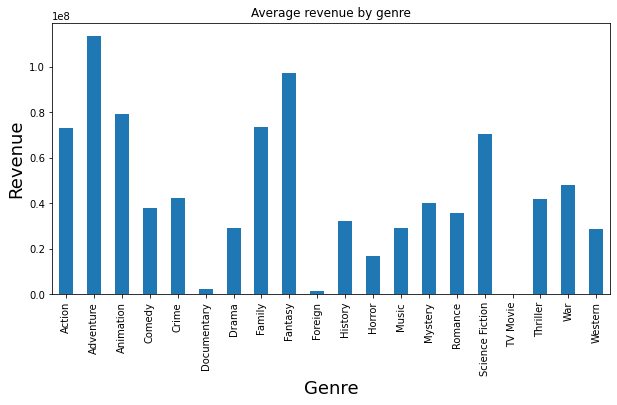

In [26]:
# To understand the output above we will do a visualization in bar chart
counts=filtered_df.groupby(['genres']).mean()['revenue']
df_bar(counts,'Genre','Revenue','Average revenue by genre')

From the bar chart above i can deduce that the movie genre "Adventure" has the highest average revenue across all the genres

### Does the average vote collated for each genre have a significant effect on the revenue?

In [27]:
#This shows the average votes collated for each year 
d_vote = filtered_df.groupby(["genres"]).mean(['vote_count'])
d_vote

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,
Action,0.929040,2.782118e+07,7.303983e+07,105.129630,394.242424,5.784891,2000.031145,3.307109e+07,9.206722e+07
Adventure,1.158480,3.769746e+07,1.136012e+08,106.430034,515.130375,5.935427,1999.356314,4.411728e+07,1.422555e+08
Animation,0.885913,2.437686e+07,7.922287e+07,70.664157,317.146084,6.384789,2004.069277,2.662471e+07,8.975005e+07
Comedy,0.594878,1.336239e+07,3.771225e+07,96.935612,177.228670,5.901245,2000.786698,1.599806e+07,4.813518e+07
Crime,0.745331,1.767686e+07,4.239998e+07,106.926829,279.002956,6.124982,1999.483370,2.154943e+07,5.667827e+07
Documentary,0.188172,5.958754e+05,2.182688e+06,103.970213,36.200000,6.898511,2008.078723,6.358139e+05,2.425647e+06
Drama,0.592844,1.191304e+07,2.931604e+07,110.516224,183.027181,6.163611,2000.932996,1.489402e+07,4.053378e+07
Family,0.794195,2.367775e+07,7.344748e+07,90.175453,275.586491,5.986903,2000.764415,2.729229e+07,8.896531e+07
Fantasy,1.000166,3.289441e+07,9.716224e+07,101.169604,424.170705,5.856057,2000.231278,3.775393e+07,1.122142e+08


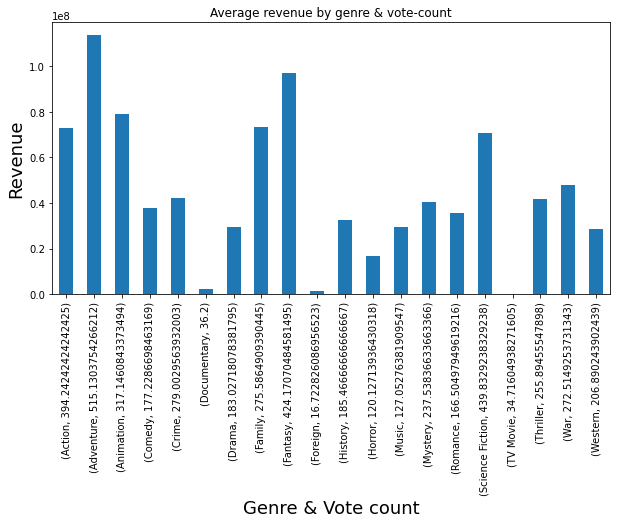

In [28]:
# To show if the average vote collated for each genre have a significant effect on the average revenue
counts=d_vote.groupby(['genres','vote_count']).mean()['revenue']
df_bar(counts,'Genre & Vote count','Revenue','Average revenue by genre & vote-count')

This shows that the vote count for each genre has an effect on the revenue of each genre.Those genres with low votes have low revenues while those with high votes have high revenue

<a id='conclusions'></a>
## Conclusions

According to all the analysis that i have done on the Movie data set, the analysis gives an insight to
1. The most popular genre of movie each year
2. The possible effect that the popularity of a movie can have on its revenue
3. The movie genre that has the highest revenue which is Adventure
4. The number of votes that are accruded to a movie genre having an effect on the revenue generated

Some of the limitation of this data set is that the null values were many and i couldn't remove them from the data set as they were vital tomy analysis so i kept them in a seperate dataframe.

Secondly as i had a long range of years to work with, i summarized some of my findings as i could not list them out one by one.

The websites that i referred to in the course of my analysis are

https://stackoverflow.com
https://www.sfu.ca
https://datatofish.com › Python
pandas.pydata.org
www.tutorialspoint.com
classroom.udacity.com